In [1]:
#!make

In [2]:
import cirq
import py_moara
#import qsimcirq
from cirq.ops import *

In [3]:
import numpy as np 
import time
import matplotlib.pyplot as plt

In [4]:
max_depth = 20
shot_count = 1

def getSimulator():
    #return cirq.Simulator()
    return qsimcirq.QSimSimulator()

def entangler(circuit,qubits):
    n = len(qubits)
    for i in range(n-1):
        circuit.append(rx(3)(qubits[i+1]).controlled_by(qubits[i]))

def entanglerReverse(circuit,qubits):
    n = len(qubits)
    for i in range(n):
        target = n-i-1
        if i != target:
            circuit.append(rx(np.pi/7)(qubits[target]).controlled_by(qubits[i]))

def entanglerCX(circuit,qubits):
    n = len(qubits)
    for i in range(n-1):
        circuit.append(CX(qubits[i],qubits[i+1]))

def entanglerReverseCX(circuit,qubits):
    n = len(qubits)
    for i in range(n):
        target = n-i-1
        if i != target:
            circuit.append(CX(qubits[i],qubits[target]))

def Rx(citrcuit,qubits):
    for q in qubits:
        citrcuit.append(rx(np.pi/3)(q))

def Ry(citrcuit,qubits):
    for q in qubits:
        citrcuit.append(ry(np.pi/5)(q))

def XY(citrcuit,qubits):
    for q in qubits:
        citrcuit.append(X(q))
        citrcuit.append(Y(q))

In [5]:
def bench(simulator, max_depth, exec_func):
    i=2
    j=2
    depth=[]
    for i in range(2,max_depth):
        duration=0
        while (duration<0.50) and j<101:
            test_qc=test(i,j)
            start_time = time.time()
            a = exec_func(simulator, test_qc)
            a.get('0',0)
            duration=(time.time() - start_time)
            j=j+1
        depth.append(j-1)
        j=2
    return depth

def scor(depth):
    sc=0
    i=2
    for x in depth:
        sc=sc+depth*i
        i=i+1
    return sc

In [6]:
def test(i,j):
    qubits = cirq.LineQubit.range(i)
    qc = cirq.Circuit()
    for k in range(j):
        Rx(qc,qubits)
        entangler(qc,qubits)
        Ry(qc,qubits)
        entanglerReverse(qc,qubits)
    for q in qubits:
        qc.append(measure(q))
    return qc

In [7]:
i=3
j=3
p=test(i,j)
p

┌────────────────────┐                                                                  ┌────────────────────┐                                                                  ┌───────────┐
0: ───Rx(0.333π)───@────────────Ry(0.2π)─────────────────@───────────────────────Rx(0.143π)───Rx(0.333π)───@────────────Ry(0.2π)─────────────────@───────────────────────Rx(0.143π)───Rx(0.333π)───@────────────Ry(0.2π)─────────────────@──────────────Rx(0.143π)───M───
                   │                                     │                       │                         │                                     │                       │                         │                                     │              │
1: ───Rx(0.333π)───Rx(0.955π)───@────────────Ry(0.2π)────┼─────────Rx(0.333π)────┼─────────────────────────Rx(0.955π)───@────────────Ry(0.2π)────┼─────────Rx(0.333π)────┼─────────────────────────Rx(0.955π)───@────────────Ry(0.2π)────┼─────────M────┼────────────────
                                │                        │                       │                                      │                        │                       │                                      │                        │              │
2: ───Rx(0.333π)────────────────Rx(0.955π)───Ry(0.2π)────Rx(0.143π)──────────────@────────────Rx(0.333π)────────────────Rx(0.955π)───Ry(0.2π)────Rx(0.143π)──────────────@────────────Rx(0.333π)────────────────Rx(0.955π)───Ry(0.2π)────Rx(0.143π)─────@────────────M───
                                                        └────────────────────┘                                                                  └────────────────────┘                                                                  └───────────┘

In [8]:
from py_moara import MoaraSimulator
simulator2 = MoaraSimulator()
result2 = simulator2.run(p, 1024)
print(result2)

{'100': 67, '110': 138, '000': 98, '011': 79, '101': 76, '111': 188, '001': 268, '010': 110}


In [9]:
def exec_func(sim, circ):
    return sim.run(circ,1)

#simulator=getSimulator()
depth=bench(simulator2,max_depth, exec_func)
print(depth)

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 98, 47, 21, 11, 6]


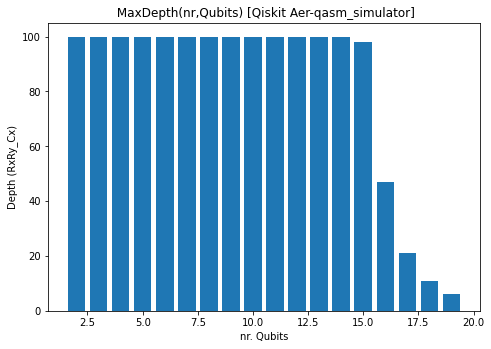

In [10]:
simulator_name='Qiskit Aer-qasm_simulator'

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(2,max_depth)]
ax.bar(langs,depth)
ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name+']')
ax.set_xlabel('nr. Qubits')
ax.set_ylabel('Depth (RxRy_Cx)')
plt.show()

In [11]:
i=3
j=3
p=test(i,j)
p._moments[1]._operations[0]#._qubits[0].__dict__#._gate.__dict__

cirq.rx(np.pi*0.954929658551372).on(cirq.LineQubit(1)).controlled_by(cirq.LineQubit(0))

In [12]:
type(p._moments[0]._operations[0]).__name__

'GateOperation'

In [13]:
p._moments[0]._operations[0].__dict__

{'_gate': cirq.rx(np.pi*0.3333333333333333), '_qubits': (cirq.LineQubit(0),)}

In [14]:
qb = cirq.LineQubit.range(3)
circ = cirq.Circuit()
circ.append(rx(np.pi/3)(qb[1]))
circ.append(cirq.measure(qb[1],qb[0]))

#type(circ._moments[0]._operations[0]).__name__
#circ._moments[0]._operations[0]._gate.__dict__
print(circ)

0: ────────────────M───
                   │
1: ───Rx(0.333π)───M───


In [15]:
circ.moments[0].operations[0].qubits

(cirq.LineQubit(1),)

In [16]:
type(circ.moments[0].operations[0].gate).__name__
circ.moments[0].operations[0].gate.exponent
#isinstance(circ.moments[0].operations[0].gate, cirq.ops.XPowGate)

0.3333333333333333

In [17]:
from cirq import ops
ops.QubitOrder.DEFAULT.__dict__

{'_explicit_func': <function cirq.ops.qubit_order.QubitOrder.sorted_by.<locals>.<lambda>(qubits)>}